In [1]:
import numpy as np
import pandas as pd
import requests
from rates_processing import calc_discount
from cds_processing import calc_cds_monthly

In [2]:
start_date = '2001-01-02'
end_date = '2024-01-31'
loss_given_default =0.6

quarterly_discount = calc_discount(start_date, end_date)
cds_spread_mean = calc_cds_monthly('mean')

/Users/Nidhi/Documents/GitHub/P15_DANK/src/interest_rates.py:65: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  processed_df.index = pd.to_datetime(processed_df.index)


WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [53]:
lambda_df = 4 * np.log(1+(cds_spread_mean/(4*loss_given_default)))
quarters = range(1, 21)  # 1 to 20 quarters

risky_duration = pd.DataFrame(index=lambda_df.index, columns=lambda_df.columns)
for col in lambda_df.columns:
    quarterly_survival_probability = pd.DataFrame(index=lambda_df.index, columns=quarters)
    for quarter in quarters:
        quarterly_survival_probability[quarter] = np.exp(-((quarter * lambda_df[col]) / 4))
    temp_df = quarterly_survival_probability * quarterly_discount
    risky_duration[col] = 0.25 * temp_df.sum(axis=1)

In [54]:
risky_duration_shifted = risky_duration.shift(1)
cds_spread_mean_shifted = cds_spread_mean.shift(1)
cds_spread_change = cds_spread_mean.diff()

In [82]:
cds_return = ((cds_spread_mean_shifted/21) + (cds_spread_change * risky_duration_shifted))

In [83]:
cds_return*100

,cds_1,cds_2,cds_3,cds_4,cds_5,cds_6,cds_7,cds_8,cds_9,cds_10,cds_11,cds_12,cds_13,cds_14,cds_15,cds_16,cds_17,cds_18,cds_19,cds_20
Date,,,,,,,,,,,,,,,,,,,,
2001-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-28,0.011023,0.013996,0.018790,0.020958,0.024258,0.028019,0.029573,0.033625,0.039160,0.043826,0.049538,0.053365,0.058939,0.078926,0.083797,0.087386,0.091575,0.120087,0.200634,0.616672
2001-03-31,0.011340,0.015278,0.016883,0.018489,0.020271,0.024167,0.029318,0.034155,0.037186,0.037696,0.039681,0.043055,0.047920,0.045796,0.063292,0.078401,0.086438,0.093602,0.108044,0.272284
2001-04-30,0.011441,0.015160,0.017471,0.019520,0.020695,0.021991,0.025668,0.034607,0.036201,0.038592,0.042094,0.043833,0.047378,0.070250,0.071864,0.086493,0.123382,0.151792,0.188223,0.387665
2001-05-31,0.009881,0.012712,0.014196,0.016635,0.019103,0.021322,0.026015,0.025307,0.028817,0.031352,0.032866,0.040615,0.051227,0.048719,0.059569,0.077247,0.081878,0.109552,0.131988,0.166387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.008411,0.013197,0.017719,0.020176,0.022589,0.025326,0.029045,0.032027,0.035717,0.038944,0.042625,0.047552,0.055823,0.067040,0.079258,0.093768,0.115918,0.149597,0.214574,1.008081
2023-09-30,0.009073,0.015184,0.019113,0.022558,0.025539,0.028938,0.031733,0.036143,0.039717,0.044003,0.048752,0.052787,0.058587,0.074726,0.088805,0.105644,0.130056,0.170578,0.239056,1.007666
2023-10-31,0.008809,0.015520,0.019843,0.022794,0.026234,0.029286,0.032247,0.035886,0.040444,0.045007,0.049757,0.054029,0.060188,0.073678,0.089442,0.104009,0.129094,0.172394,0.244729,1.323591


In [50]:
actual_return = pd.read_csv('/Users/Nidhi/Downloads/He_Kelly_Manela_Factors_And_Test_Assets_monthly.csv')


In [51]:
actual_return = actual_return[['yyyymm','CDS_01','CDS_02','CDS_03','CDS_04','CDS_05','CDS_06','CDS_07','CDS_08','CDS_09','CDS_10','CDS_11','CDS_12','CDS_13','CDS_14','CDS_15','CDS_16','CDS_17','CDS_18','CDS_19','CDS_20']]

In [52]:
actual_return = actual_return.dropna(axis=0)
actual_return*100

,yyyymm,CDS_01,CDS_02,CDS_03,CDS_04,CDS_05,CDS_06,CDS_07,CDS_08,CDS_09,...,CDS_11,CDS_12,CDS_13,CDS_14,CDS_15,CDS_16,CDS_17,CDS_18,CDS_19,CDS_20
373,20010200.0,0.39,0.40,0.33,0.24,0.93,0.30,0.20,0.48,0.44,...,0.78,-0.36,0.42,0.57,0.27,-1.53,-0.32,0.70,0.05,1.93
374,20010300.0,0.12,0.41,0.61,0.45,0.73,0.59,0.79,0.71,0.87,...,0.60,0.42,0.32,0.68,-0.12,0.93,0.83,-0.12,0.72,2.19
375,20010400.0,0.33,0.44,0.44,0.60,0.54,0.37,0.44,0.44,0.68,...,0.98,1.06,0.84,0.98,0.83,1.24,0.61,1.09,0.41,-0.18
376,20010500.0,0.38,0.43,0.45,0.39,0.44,0.39,0.40,0.75,0.45,...,0.76,0.78,0.49,1.17,1.08,0.61,1.50,1.52,1.84,1.40
377,20010600.0,0.30,0.27,0.44,0.37,0.79,0.42,0.53,0.35,0.40,...,0.31,0.29,0.38,0.45,0.34,0.44,0.20,0.73,0.65,-0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,20120800.0,0.05,0.09,0.13,0.11,0.22,0.22,0.24,0.17,0.15,...,0.31,0.15,0.35,0.32,0.43,0.62,0.84,0.60,0.51,1.52
512,20120900.0,0.12,0.10,0.20,0.22,0.30,0.23,0.30,0.33,0.39,...,0.49,0.59,0.57,0.87,0.70,0.83,0.92,1.20,1.19,1.74
513,20121000.0,0.10,0.09,0.09,0.16,0.18,0.19,0.14,0.10,0.19,...,0.08,0.28,0.43,0.42,0.13,0.45,0.33,0.28,-0.10,0.45
514,20121100.0,-0.06,-0.07,-0.09,-0.07,-0.10,-0.10,-0.09,-0.16,-0.16,...,-0.37,-0.05,-0.12,0.05,0.15,-0.02,0.26,0.27,1.07,0.15


<Axes: xlabel='Date'>

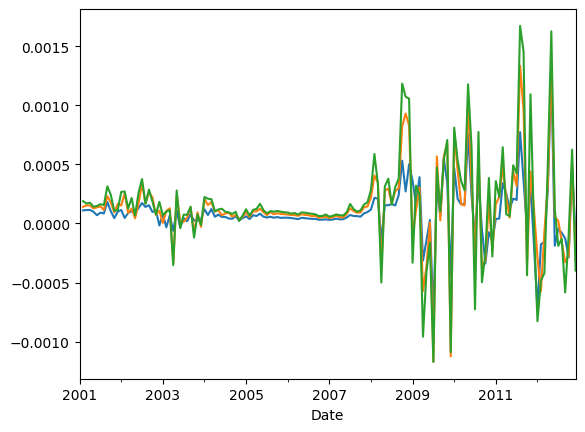

In [84]:
cds_return_paper = cds_return[cds_return.index <= '2012-12-31']
cds_return_paper['cds_1'].plot()
cds_return_paper['cds_2'].plot()
cds_return_paper['cds_3'].plot()

<Axes: >

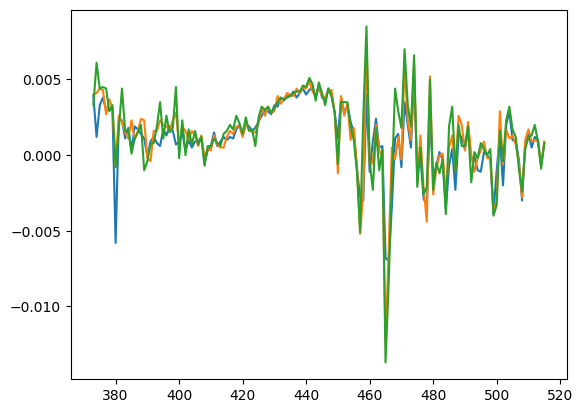

In [65]:
actual_return['CDS_01'].plot()
actual_return['CDS_02'].plot()
actual_return['CDS_03'].plot()